In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
from tqdm import tqdm
import os
%matplotlib inline  

In [3]:
night_control_PR_curve_df = pd.read_csv("runs/detect/night_control/pr_curve_results.csv")
night_blended_PR_curve_df = pd.read_csv("runs/detect/night_blended/pr_curve_results.csv")

In [4]:
night_blended_PR_curve_df.head()

,recall,person_precision,people_precision,cyclist_precision
0,0.000000,1.0,1.0,1.0
1,0.001001,1.0,1.0,1.0
2,0.002002,1.0,1.0,1.0
3,0.003003,1.0,1.0,1.0
4,0.004004,1.0,1.0,1.0


In [5]:
pr_curve_df =  pd.DataFrame()

pr_curve_df["recall"] = night_blended_PR_curve_df.recall

pr_curve_df["person_control"] = night_control_PR_curve_df.person_precision
pr_curve_df["person_blended"] = night_blended_PR_curve_df.person_precision

pr_curve_df["people_control"] = night_control_PR_curve_df.people_precision
pr_curve_df["people_blended"] = night_blended_PR_curve_df.people_precision

pr_curve_df["cyclist_control"] = night_control_PR_curve_df.cyclist_precision
pr_curve_df["cyclist_blended"] = night_blended_PR_curve_df.cyclist_precision

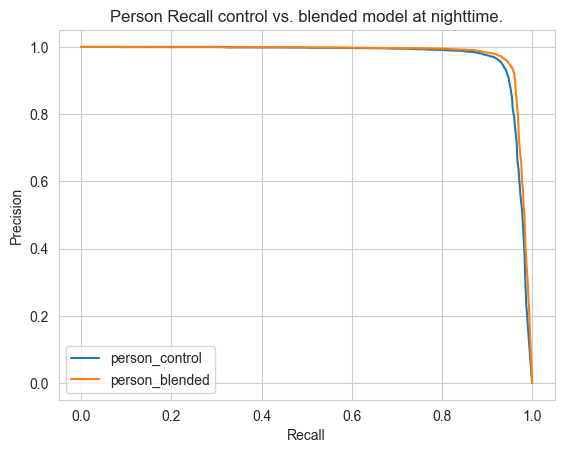

In [6]:
# Set the style
sns.set_style("whitegrid")

# Create the line plot
sns.lineplot(x="recall", y="person_control", data=pr_curve_df, label="person_control")
sns.lineplot(x="recall", y="person_blended", data=pr_curve_df, label="person_blended")

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Person Recall control vs. blended model at nighttime.')

# Show the plot
plt.show()

In [18]:
mean_results_night_control_df = pd.read_csv("runs/detect/night_control/mean_results.csv")
mean_results_night_blended_df = pd.read_csv("runs/detect/night_blended/mean_results.csv")

In [19]:
mean_results_night_control_df.head()

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,metrics/mAP50_person,metrics/mAP50_people,metrics/mAP50_cyclist,metrics/mAP50-95_person,metrics/mAP50-95_people,metrics/mAP50-95_cyclist
0,0.947497,0.916189,0.958873,0.682918,0.710514,0.969705,0.921195,0.98572,0.728538,0.672495,0.647722


In [20]:
night_class_mean_values_df = pd.DataFrame()
night_class_mean_values_df["Precision"] = [mean_results_night_control_df["metrics/precision(B)"].values()[0], mean_results_night_blended_df["metrics/precision(B)"].values()[0]]
night_class_mean_values_df["Recall"] = [mean_results_night_control_df["metrics/recall(B)"].values()[0], mean_results_night_blended_df["metrics/recall(B)"].values()[0]]

TypeError: 'numpy.ndarray' object is not callable

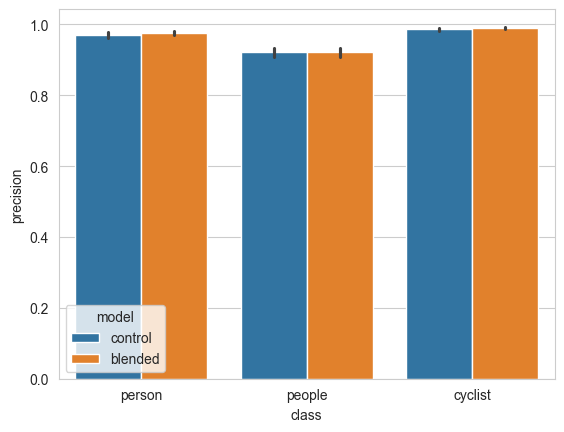

In [17]:
sns.barplot(x = 'class',
            y = 'precision',
            hue = 'model',
            data = melted_df)
plt.show()

In [10]:
df = sns.load_dataset('titanic')

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


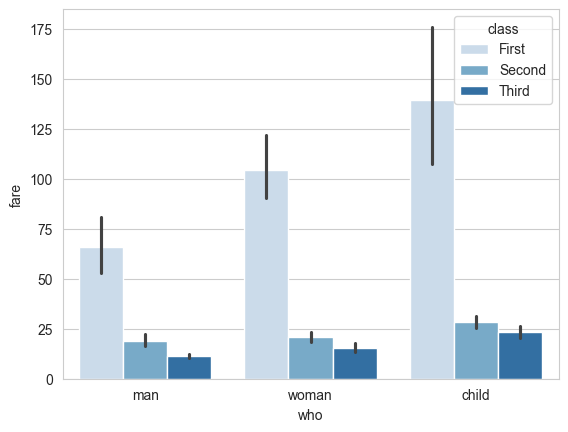

In [12]:
# who v/s fare barplot 
sns.barplot(x = 'who',
            y = 'fare',
            hue = 'class',
            data = df,
            palette = "Blues")
 
# Show the plot
plt.show()